In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#fifa = pd.read_csv('fifa_data.csv')
fifa = pd.read_csv('players_20.csv')

fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


Histogram

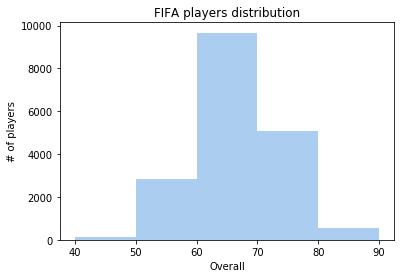

In [4]:
bins = range(40,100,10)

plt.hist(fifa.overall, bins = bins, color = '#abcdef')
plt.xticks(bins)
plt.title('FIFA players distribution')
plt.xlabel('Overall')
plt.ylabel('# of players')

plt.show()

Pie Chart

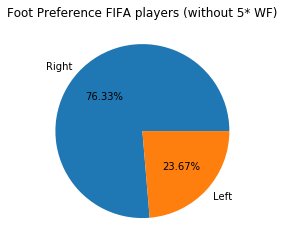

In [5]:
right = fifa.loc[(fifa["preferred_foot"] == 'Right') & (fifa["weak_foot"] != 5)].count()[0]
left = fifa.loc[(fifa["preferred_foot"] == 'Left') & (fifa["weak_foot"] != 5)].count()[0]

plt.pie([right,left], labels = ['Right','Left'],autopct = '%.2f%%')
plt.title('Foot Preference FIFA players (without 5* WF)')
plt.show()

In [6]:
weight_lbs = pd.DataFrame(data=fifa.weight_kg*2.20462)
weight_lbs.head()
fifa['Weight']= weight_lbs
fifa.Weight.head()

0    158.73264
1    182.98346
2    149.91416
3    191.80194
4    163.14188
Name: Weight, dtype: float64

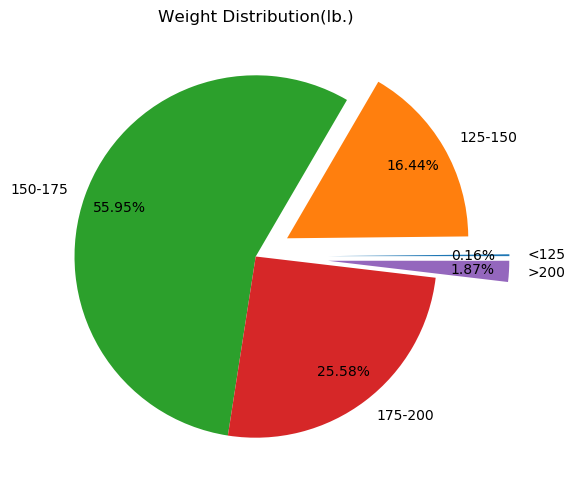

In [7]:
plt.figure(figsize=(6,6), dpi = 100)


light = fifa.loc[fifa.Weight<125].count()[0]
light_medium = fifa.loc[(fifa.Weight>124)&(fifa.Weight<150)].count()[0]
medium = fifa.loc[(fifa.Weight>150)&(fifa.Weight<175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight>175)&(fifa.Weight<200)].count()[0]
heavy = fifa.loc[fifa.Weight>200].count()[0]

plt.title('Weight Distribution(lb.)')
plt.pie([light,light_medium,medium,medium_heavy,heavy],labels = ['<125','125-150','150-175','175-200','>200'], pctdistance=.8, autopct='%.2f%%',explode=(.4,.2,0,0,.4))
plt.show()

Box and Whiskers

In [8]:
fifa.groupby(['club']).mean()['overall'].sort_values(ascending = False).head(10)


club
FC Bayern München      81.304348
Real Madrid            80.121212
Juventus               80.060606
Uruguay                78.608696
FC Barcelona           78.363636
Netherlands            78.000000
Colombia               78.000000
Mexico                 78.000000
Bayer 04 Leverkusen    77.280000
Chelsea                77.060606
Name: overall, dtype: float64